In [1]:
#https://www.tensorflow.org/tutorials/keras/regression?hl=ko

from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pydot

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
len(dataset)

398

In [5]:
dataset = dataset.dropna() ## 불량데이터 제거
dataset.pop('Origin')

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [6]:
len(dataset)

392

In [7]:
#training set과 test set으로 분리

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [8]:
len(train_dataset), len(test_dataset)

(314, 78)

In [9]:
# 타깃(레이블) 분리하기 : MPG
train_labels = train_dataset.pop("MPG") #MPG(연비)는 예측하려는 값(y)이므로 nomalizaion안함
test_labels = test_dataset.pop("MPG")

In [10]:
#normalization

train_stats = train_dataset.describe()
train_stats = train_stats.T
train_stats

def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [11]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


In [12]:
# Modeling

inputs = keras.Input(shape=(train_dataset.shape[1])) #데이터셋의 열 개수 => 행렬의 크기 결정!
h = layers.Dense(64)(inputs) #중간레이어
h = layers.Activation('relu')(h)
h = layers.Dense(32)(h)
outputs = layers.Dense(1)(h) # 출력 값 개수 -> 1개!

In [13]:
model = keras.Model(inputs=inputs,outputs=outputs)

In [14]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))

In [15]:
#모델 확인
model.summary() #표로 출력
print('\n\n')
keras.utils.plot_model(model,'my.png', show_shapes=True) #이미지로 출력, 왜안될까...?

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________



Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [16]:
#훈련 전 출력값 확인
example_batch = normed_train_data[:5] #train data 중 5개 가져오기
example_result = model.predict(example_batch) # .predict로 y값 계산
example_result #물론 아직 실제값과는 차이가 크다.

array([[ 0.48298562],
       [ 0.5547806 ],
       [-0.19080777],
       [ 0.82280236],
       [ 0.8097054 ]], dtype=float32)

In [23]:
#모델 훈련

EPOCHS = 100 # 1epoch = 모든 데이터 1바퀴

history = model.fit(
    normed_train_data, 
    train_labels , 
    epochs=EPOCHS ,  
    validation_split = 0.2 #과적합 여부 판단을 위해 분리해놓은 데이터
)

Train on 251 samples, validate on 63 samples
Epoch 1/100
251/251 [==============================] - 0s 86us/sample - loss: 10.5278 - val_loss: 12.9524
Epoch 2/100
251/251 [==============================] - 0s 380us/sample - loss: 10.0026 - val_loss: 13.5374
Epoch 3/100
251/251 [==============================] - 0s 722us/sample - loss: 9.8968 - val_loss: 12.2056
Epoch 4/100
251/251 [==============================] - 0s 360us/sample - loss: 9.6140 - val_loss: 12.1402
Epoch 5/100
251/251 [==============================] - 0s 84us/sample - loss: 9.3928 - val_loss: 12.5313
Epoch 6/100
251/251 [==============================] - 0s 110us/sample - loss: 9.3757 - val_loss: 11.8760
Epoch 7/100
251/251 [==============================] - 0s 391us/sample - loss: 9.3192 - val_loss: 12.1159
Epoch 8/100
251/251 [==============================] - 0s 398us/sample - loss: 9.0029 - val_loss: 11.5349
Epoch 9/100
251/251 [==============================] - 0s 396us/sample - loss: 8.8098 - val_loss: 11.5209
E

In [22]:
# patience : n회 이상 val_loss가 줄지 않을때 stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss' , patience=10)

model.fit(
    normed_train_data, 
    train_labels , 
    epochs=EPOCHS ,  
    validation_split = 0.2 , #과적합 여부 판단을 위해 분리해놓은 데이터
    callbacks=[early_stop]
)

ValueError: Failed to find data adapter that can handle input: <class 'int'>, <class 'pandas.core.series.Series'>

In [24]:
loss = model.evaluate(normed_test_data, test_labels, verbose=2)

78/78 - 0s - loss: 6.5170


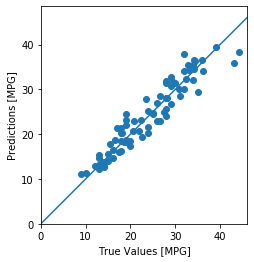

In [25]:
#예측


test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


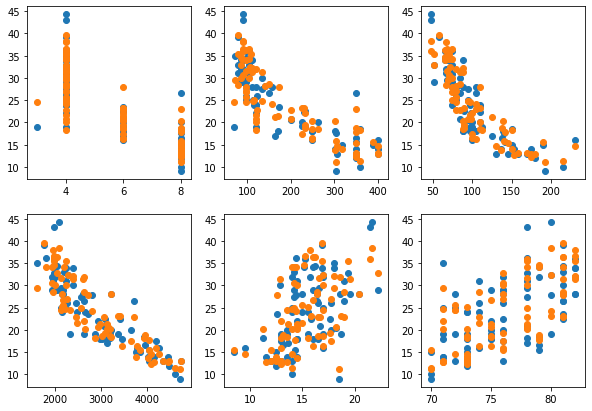

In [52]:
plt.figure(figsize=(10,7))
plt.subplot(231)
plt.scatter(test_dataset['Cylinders'], test_labels)
plt.scatter(test_dataset['Cylinders'], test_predictions)
plt.subplot(232)
plt.scatter(test_dataset['Displacement'], test_labels)
plt.scatter(test_dataset['Displacement'], test_predictions)
plt.subplot(233)
plt.scatter(test_dataset['Horsepower'], test_labels)
plt.scatter(test_dataset['Horsepower'], test_predictions)
plt.subplot(234)
plt.scatter(test_dataset['Weight'], test_labels)
plt.scatter(test_dataset['Weight'], test_predictions)
plt.subplot(235)
plt.scatter(test_dataset['Acceleration'], test_labels)
plt.scatter(test_dataset['Acceleration'], test_predictions)
plt.subplot(236)
plt.scatter(test_dataset['Model Year'], test_labels)
plt.scatter(test_dataset['Model Year'], test_predictions)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
9,8,390.0,190.0,3850.0,8.5,70
25,8,360.0,215.0,4615.0,14.0,70
28,8,304.0,193.0,4732.0,18.5,70
31,4,113.0,95.0,2228.0,14.0,71
33,6,232.0,100.0,2634.0,13.0,71
...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82
375,4,105.0,74.0,1980.0,15.3,82
382,4,108.0,70.0,2245.0,16.9,82
384,4,91.0,67.0,1965.0,15.7,82
